# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

My answers:

In [12]:
import pandas as pd
import numpy as np

In [11]:
import urllib.request
import os
import zipfile

def download_data(force=False):
    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir

download_data()

'./data'

In [23]:
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")

In [24]:
#Q1.1
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
airbnb["Price"].head()

airbnb["Price_clean"] = (
    airbnb["Price"]
    .astype(str)
    .str.strip()
    .replace({"nan": np.nan})
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)
airbnb["Price_clean"] = pd.to_numeric(airbnb["Price_clean"], errors="coerce")

price_missing = airbnb["Price_clean"].isna().sum()
price_missing

np.int64(0)

In [28]:
#Q1.2
police = pd.read_csv("data/mn_police_use_of_force.csv", encoding="latin1")

police["subject_injury"].value_counts(dropna=False).head(20)

import pandas as pd
import numpy as np

police = pd.read_csv("data/mn_police_use_of_force.csv", encoding="latin1")

# Find the subject injury column even if it's slightly different
inj_cols = [c for c in police.columns if "injur" in c.lower()]
if len(inj_cols) == 0:
    raise ValueError("Could not find an injury column. Check police.columns to see what's available.")
inj_col = inj_cols[0]
print("Using injury column:", inj_col)

# Clean to Yes/No/NA first
inj = police[inj_col].astype("string").str.strip().str.lower()

police["subject_injury_clean"] = inj.map({
    "yes": "Yes", "y": "Yes", "injured": "Yes", "injury": "Yes",
    "no": "No", "n": "No", "not injured": "No", "none": "No"
})

# Proportion missing
inj_missing_prop = police["subject_injury_clean"].isna().mean()
print("Proportion missing (before labeling Missing):", inj_missing_prop)

# Cross-tab with force_type (includes missing row)
if "force_type" not in police.columns:
    raise ValueError("force_type column not found. Check police.columns for the exact name.")
display(pd.crosstab(police["subject_injury_clean"], police["force_type"], dropna=False))

# Replace remaining missing with label "Missing"
police["subject_injury_clean"] = police["subject_injury_clean"].fillna("Missing")

police["subject_injury_clean"].value_counts(dropna=False)


Using injury column: subject_injury
Proportion missing (before labeling Missing): 0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury_clean,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


,count
subject_injury_clean,
Missing,9848
Yes,1631
No,1446


In [29]:
#Q1.3
metabric = pd.read_csv("data/metabric.csv", encoding="latin1")

metabric["Overall Survival Status"].value_counts(dropna=False)

status = (
    metabric["Overall Survival Status"]
    .astype("string")
    .str.strip()
    .str.lower()
)

metabric["survival_dummy"] = status.map({
    "deceased": 0,
    "living": 1
})

metabric["survival_dummy"].value_counts(dropna=False)


,count
survival_dummy,
NaN,1343


In [30]:
#Q1.4
review_missing_count = airbnb["Review Scores Rating"].isna().sum()
review_missing_count

median_review = airbnb["Review Scores Rating"].median(skipna=True)

airbnb["Review Scores Rating_imputed"] = airbnb["Review Scores Rating"].fillna(median_review)

airbnb[["Review Scores Rating", "Review Scores Rating_imputed"]].head(10)

,Review Scores Rating,Review Scores Rating_imputed
0,NaN,94.0
1,NaN,94.0
2,NaN,94.0
3,NaN,94.0
4,96.0,96.0
5,100.0,100.0
6,100.0,100.0
7,94.0,94.0
8,90.0,90.0
9,96.0,96.0


Median imputation can bias results because it reduces variance and can weaken relationships with other variables. If reviews are missing, imputing the median makes those listings look more “typical” than they really are.


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

My answers:

In [31]:
import matplotlib.pyplot as plt


In [35]:
#Q2.1
sharks = pd.read_excel("GSAF5.xls")

sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Q2.2
sharks = sharks.dropna(axis=1, how="all")

sharks.shape

(7074, 23)

Q2.3 An observation in this dataset represents a single documented shark attack incident involving a person at a particular time and location. Each row corresponds to one event, with variables describing characteristics such as the year of the attack, the victim’s age, whether the attack was provoked, and whether it was fatal. Treating each row as an individual incident ensures that cleaning decisionspreserve the integrity of each recorded encounter.


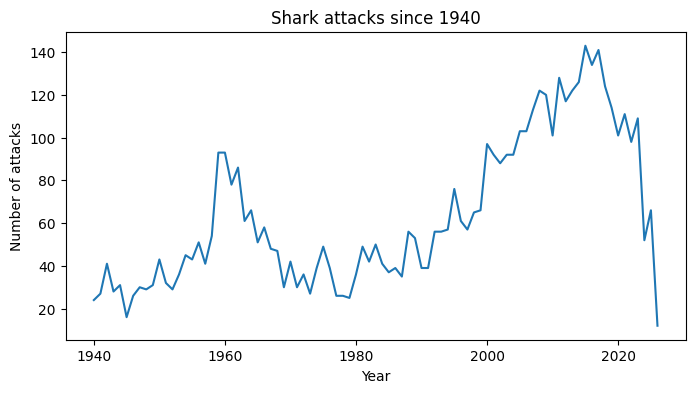

In [38]:
#Q2.4
sharks["Year_clean"] = pd.to_numeric(sharks["Year"], errors="coerce")
sharks["Year_clean"].min(), sharks["Year_clean"].max()
recent = sharks[sharks["Year_clean"] >= 1940]
attacks_per_year = recent["Year_clean"].value_counts().sort_index()

plt.figure(figsize=(8,4))
plt.plot(attacks_per_year.index, attacks_per_year.values)
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Shark attacks since 1940")
plt.show()



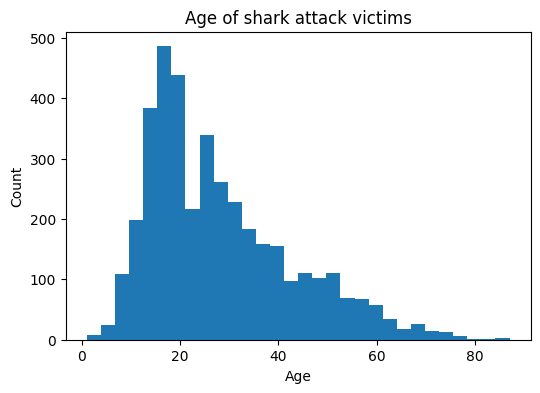

In [39]:
#Q2.5
sharks["Age_clean"] = pd.to_numeric(sharks["Age"], errors="coerce")

sharks["Age_clean"].describe()

plt.figure(figsize=(6,4))
plt.hist(sharks["Age_clean"].dropna(), bins=30)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age of shark attack victims")
plt.show()

In [40]:
#Q2.6
type_clean = (
    sharks["Type"]
    .astype("string")
    .str.strip()
    .str.lower()
)

sharks["Type_clean"] = type_clean.map({
    "provoked": "Provoked",
    "unprovoked": "Unprovoked"
})

sharks["Type_clean"] = sharks["Type_clean"].fillna("Unknown")

sharks["Type_clean"].value_counts(normalize=True)

(sharks["Type_clean"] == "Unprovoked").mean()

np.float64(0.7387616624257846)

In [41]:
#Q2.7
fatal = (
    sharks["Fatal Y/N"]
    .astype("string")
    .str.strip()
    .str.upper()
)

sharks["Fatal_clean"] = fatal.map({
    "Y": "Y",
    "N": "N"
})

sharks["Fatal_clean"] = sharks["Fatal_clean"].fillna("Unknown")

sharks["Fatal_clean"].value_counts()

,count
Fatal_clean,
N,4942
Y,1489
Unknown,643


In [42]:
#Q2.8
pd.crosstab(
    sharks["Type_clean"],
    sharks["Fatal_clean"],
    normalize="index"
)

Fatal_clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742250,0.015117,0.242633


Unprovoked attacks tend to have a higher proportion of fatalities than provoked attacks. This likely reflects that unprovoked encounters occur unexpectedly in open water, while provoked incidents often involve intentional human interaction with sharks, allowing more control over the situation

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

My answers:

1. The paper introduces the concept of tidy data and explains why a consistent data structure is essential for efficient data cleaning and analysis. Wickham says that most data analysis tasks become easier when datasets follow a standard format where variables, observations, and values are clearly organized. The paper also describes common ways datasets become messy and provides strategies for restructuring them.



2. The tidy data standard is intended to make data analysis faster, easier, and more reproducible by providing a consistent structure for datasets. When data follow this standard, tools for manipulation, visualization, and modeling work better and may require less custom cleaning. The goal is to reduce time spent cleaning/wrangling data and allow analysts to focus on understanding results.


3. This sentence means that tidy datasets follow a predictable structure, while messy datasets can be disorganized in many different forms. This makes tidy data easy to work with but messy data difficult and inconsistent. The second sentence highlights that while it is usually intuitive to identify variables and observations within a specific dataset, creating a universal definition that works across all datasets is challenging. Different contexts can blur the line between variables and observations, which also contributes to messy data.


4. Wickham defines values as the individual pieces of data stored in a dataset, such as a specific age or measurement. Variables are the characteristics being measured and each variable forms a column in a tidy dataset. Observations are the individual units being measured, such as a person, event, or location, and each observation forms a row.


5. A dataset is considered tidy when each variable has its own column, each observation has its own row, and each value has its own cell. This ensures consistency and allows data analysis tools to operate efficiently and effectively.


6. The five most common problems are:
- Column headers that contain values instead of variable names
- Multiple variables stored in a single column
- Variables stored in both rows and columns
- Multiple observational units stored in the same table
- A single observational unit stored across multiple tables


---


Table 4 is messy because variable values are stored in column headers rather than in a single variable column. This spreads one variable across many columns, making it difficult to summarize.
Melting a dataset refers to transforming it from a wide format into a long format by turning column headers that represent values into rows. This process creates a single variable column and corresponding value column.



7. Table 11 is messy because it stores multiple variables across both rows and columns, mixing variable names with values and violating tidy data principles. Table 12 is tidy and molten because the data have been reshaped so that each variable has its own column and each observation has its own row. Values previously embedded in headers or spread across columns are now stored in a single column, making the dataset consistent and easy to analyze.


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

My answers:

In [43]:
#Q4.1
gifts = pd.read_csv("data/ForeignGifts_edu.csv", encoding="latin1")
gifts.head()


,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


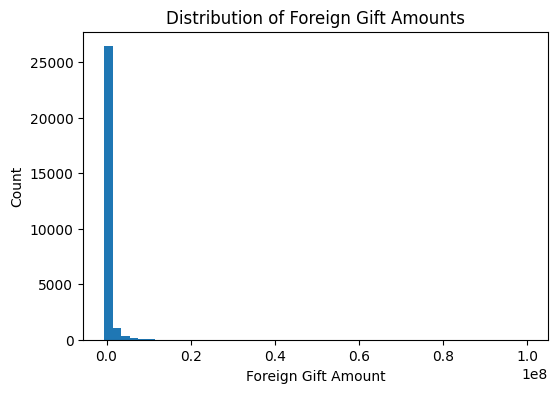

In [47]:
#Q4.2
gifts["Foreign Gift Amount"] = (
    gifts["Foreign Gift Amount"]
    .astype(str)
    .str.replace(",", "", regex=False)
    .str.replace("$", "", regex=False)
)

gifts["Foreign Gift Amount"] = pd.to_numeric(
    gifts["Foreign Gift Amount"], errors="coerce"
)

plt.figure(figsize=(6,4))
plt.hist(gifts["Foreign Gift Amount"].dropna(), bins=50)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Count")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

#The plot below is extremely right-skewed, many small gifts and few very large ones.


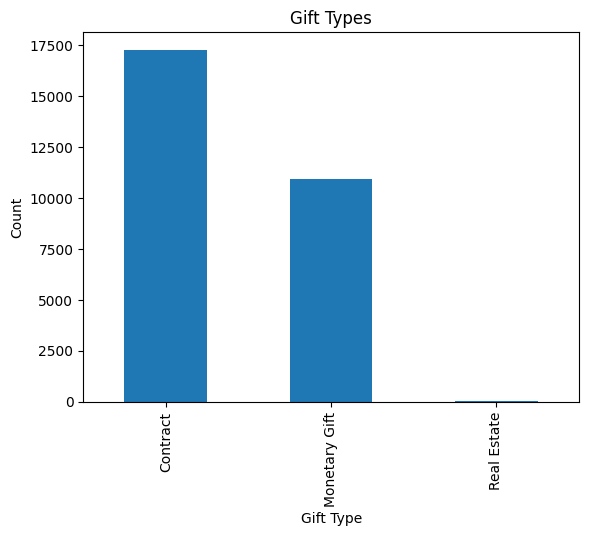

In [52]:
#Q4.3
gift_type_counts = gifts["Gift Type"].value_counts()
gift_type_props = gifts["Gift Type"].value_counts(normalize=True)

gift_type_counts, gift_type_props

gift_type_counts.plot(kind="bar", title="Gift Types")
plt.ylabel("Count")
plt.show()

In [55]:
#Q4.4
top_countries_count = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .count()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_count

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [56]:
top_countries_amount = (
    gifts.groupby("Country of Giftor")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_countries_amount

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [57]:
#Q4.5
institution_totals = (
    gifts.groupby("Institution Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
)
institution_totals.head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


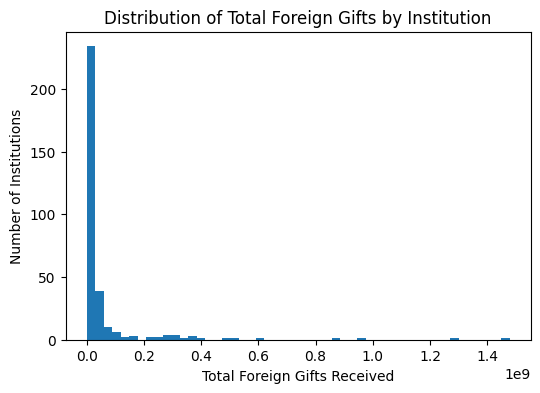

In [58]:
plt.figure(figsize=(6,4))
plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gifts Received")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts by Institution")
plt.show()


In [59]:
#Q4.6
top_giftors = (
    gifts.groupby("Giftor Name")["Foreign Gift Amount"]
    .sum()
    .sort_values(ascending=False)
    .head(15)
)

top_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

My answers:

In [63]:
#Q5.1
cc = pd.read_csv("data/college_completion.csv", encoding="latin1")

In [64]:
#Q5.2
cc.shape

(3798, 63)

In [65]:
cc.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [66]:
#Q5.3
ct = pd.crosstab(cc["control"], cc["level"])
ct

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


The crosstab shows that institutional control is not evenly distributed across levels. Public institutions are often more common among 2-year schools, while private not-for-profit institutions tend to be concentrated among 4-year schools. Private for-profit institutions appear in both categories but typically represent a smaller share overall.


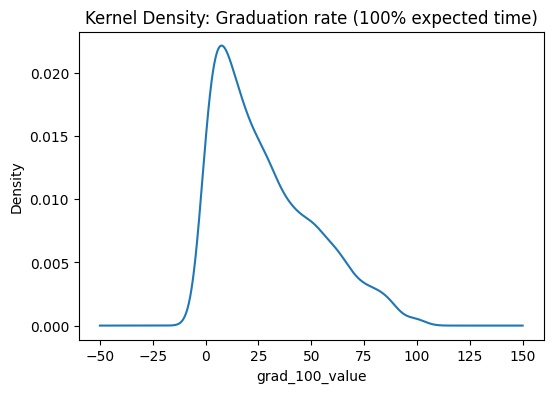

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [67]:
#Q5.4
x = cc["grad_100_value"].dropna()

plt.figure(figsize=(6,4))
x.plot(kind="kde")
plt.xlabel("grad_100_value")
plt.title("Kernel Density: Graduation rate (100% expected time)")
plt.show()

x.describe()

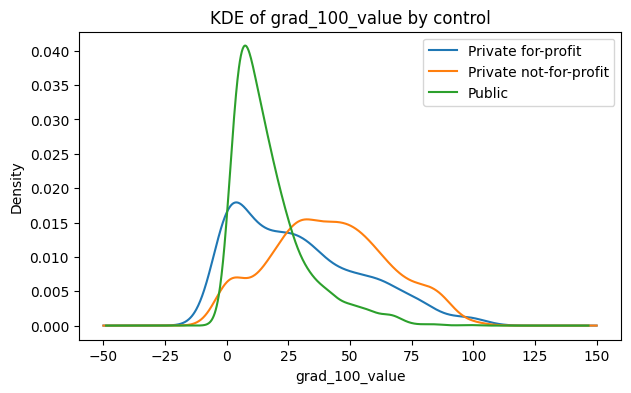

In [68]:
plt.figure(figsize=(7,4))
for grp, df_grp in cc.groupby("control"):
    vals = df_grp["grad_100_value"].dropna()
    if len(vals) > 5:
        vals.plot(kind="kde", label=str(grp))
plt.xlabel("grad_100_value")
plt.title("KDE of grad_100_value by control")
plt.legend()
plt.show()


Graduation rates vary noticeably by institutional control. Private not-for-profit institutions tend to show higher typical grad values (higher center of the distribution), while public institutions often have more spread. Private for-profit institutions tend to have lower graduation rates on average in many datasets, though the exact pattern should be confirmed from the grouped describe table.


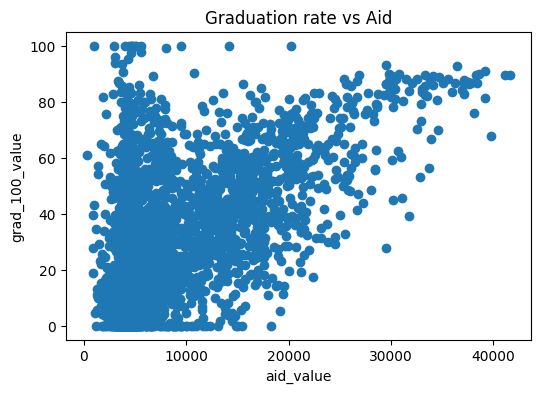

(np.float64(88610.48316902434), np.float64(0.5758792845936073))

In [69]:
#Q5.5
df = cc[["aid_value", "grad_100_value", "control"]].dropna()

plt.figure(figsize=(6,4))
plt.scatter(df["aid_value"], df["grad_100_value"])
plt.xlabel("aid_value")
plt.ylabel("grad_100_value")
plt.title("Graduation rate vs Aid")
plt.show()

cov_overall = df["aid_value"].cov(df["grad_100_value"])
corr_overall = df["aid_value"].corr(df["grad_100_value"])
cov_overall, corr_overall

Overall, the scatterplot suggests a (weak/moderate) relationship between aid_value and grad_100_value. The covariance and correlation quantify this pattern: a positive correlation indicates that higher aid tends to be associated with higher graduation rates, while a negative value would indicate the opposite.

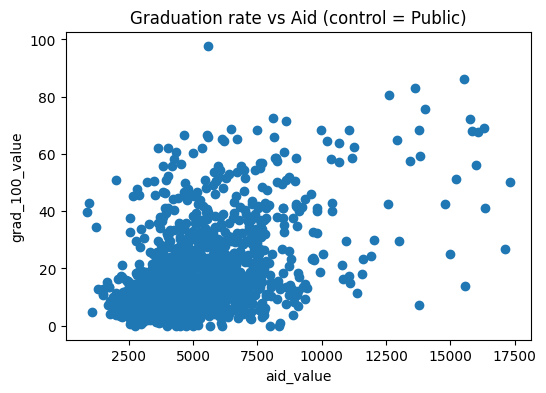

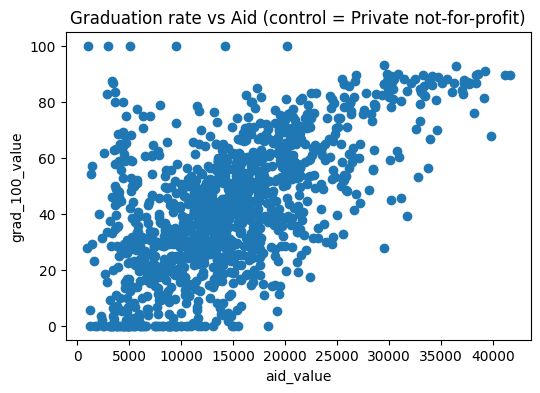

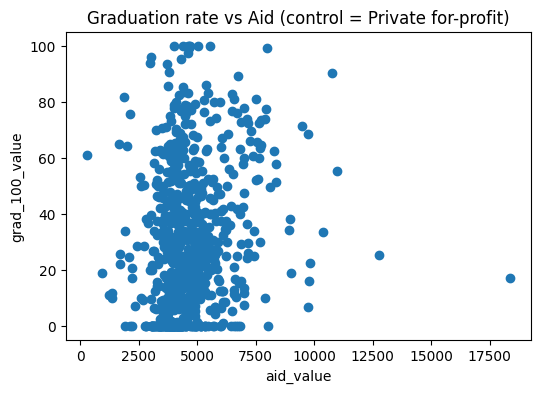

In [70]:
controls = df["control"].dropna().unique()

for c in controls:
    sub = df[df["control"] == c]
    plt.figure(figsize=(6,4))
    plt.scatter(sub["aid_value"], sub["grad_100_value"])
    plt.xlabel("aid_value")
    plt.ylabel("grad_100_value")
    plt.title(f"Graduation rate vs Aid (control = {c})")
    plt.show()

In [71]:
stats_by_control = (
    df.groupby("control")[["aid_value", "grad_100_value"]]
    .apply(lambda g: pd.Series({
        "n": len(g),
        "cov": g["aid_value"].cov(g["grad_100_value"]),
        "corr": g["aid_value"].corr(g["grad_100_value"])
    }))
)

stats_by_control

,n,cov,corr
control,,,
Private for-profit,778.0,6897.524957,0.188363
Private not-for-profit,1189.0,109274.123337,0.601591
Public,1499.0,15355.146212,0.482481


When conditioning on control, the relationship between aid and graduation rates change. Some institution types may show a stronger positive association, while others may show little relationship or even a negative one. Based on the groupwise correlations, aid appears to vary most positively with graduation rates for the control category with the largest positive correlation value.


**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

Answers are uploaded by photo onto Github.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [72]:
#Q7.1
ames = pd.read_csv("data/ames_prices.csv", encoding="latin1")
ames.head()

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


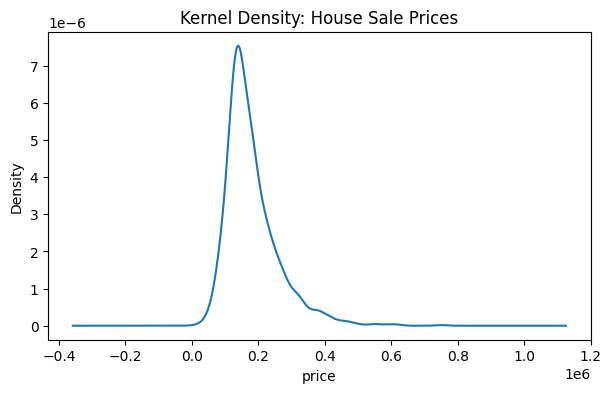

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [73]:
#Q7.2
price = ames["price"].dropna()

plt.figure(figsize=(7,4))
price.plot(kind="kde")
plt.xlabel("price")
plt.title("Kernel Density: House Sale Prices")
plt.show()

price.describe()

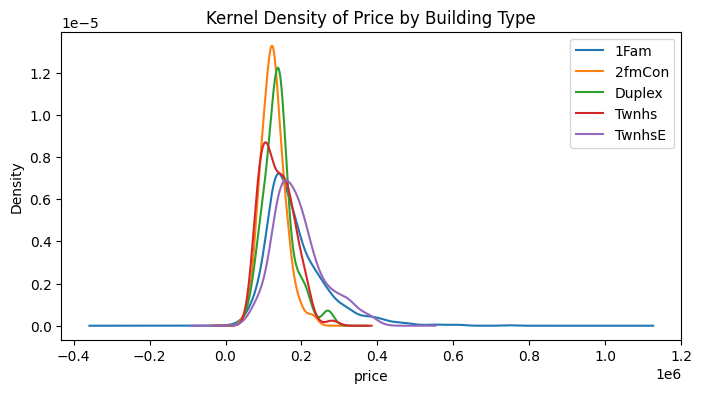

In [74]:
plt.figure(figsize=(8,4))
for btype, g in ames.groupby("Bldg.Type"):
    vals = g["price"].dropna()
    if len(vals) > 5:
        vals.plot(kind="kde", label=str(btype))
plt.xlabel("price")
plt.title("Kernel Density of Price by Building Type")
plt.legend()
plt.show()

In [75]:
desc_by_type = ames.groupby("Bldg.Type")["price"].describe()
desc_by_type

,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


In [76]:
var_by_type = ames.groupby("Bldg.Type")["price"].var().sort_values(ascending=False)
mean_by_type = ames.groupby("Bldg.Type")["price"].mean().sort_values(ascending=False)

mean_by_type, var_by_type

(Bldg.Type
 TwnhsE    192311.914163
 1Fam      184812.041237
 Duplex    139808.935780
 Twnhs     135934.059406
 2fmCon    125581.709677
 Name: price, dtype: float64,
 Bldg.Type
 1Fam      6.859451e+09
 TwnhsE    4.381346e+09
 Twnhs     1.758874e+09
 Duplex    1.560169e+09
 2fmCon    9.665408e+08
 Name: price, dtype: float64)

Based on the groupby mean of price, the most expensive building type on average is the 1Fam. The highest variance in transaction prices occurs for the Townhouse, indicating that prices in that category are more spread out.


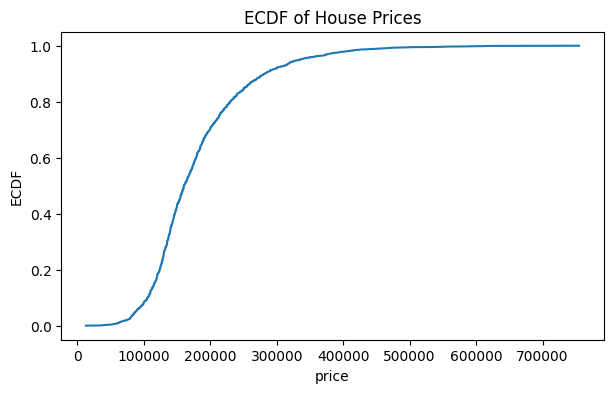

In [77]:
#Q7.3
x = ames["price"].dropna().sort_values().values
y = np.arange(1, len(x) + 1) / len(x)

plt.figure(figsize=(7,4))
plt.plot(x, y)
plt.xlabel("price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices")
plt.show()

In [78]:
five_num = {
    "min": np.min(x),
    "q25": np.quantile(x, 0.25),
    "median": np.quantile(x, 0.50),
    "q75": np.quantile(x, 0.75),
    "max": np.max(x)
}
five_num

{'min': np.int64(12789),
 'q25': np.float64(129500.0),
 'median': np.float64(160000.0),
 'q75': np.float64(213500.0),
 'max': np.int64(755000)}

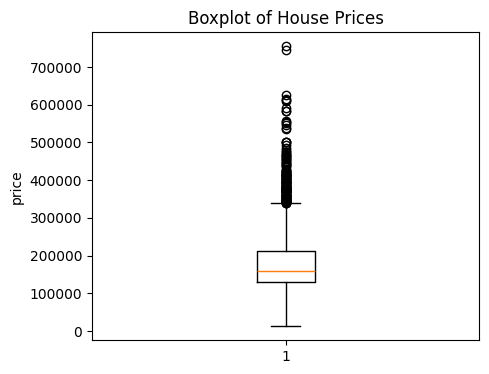

In [79]:
#Q7.4
plt.figure(figsize=(5,4))
plt.boxplot(ames["price"].dropna(), vert=True)
plt.ylabel("price")
plt.title("Boxplot of House Prices")
plt.show()

/tmp/ipython-input-3779905127.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=types, vert=True, showfliers=True)


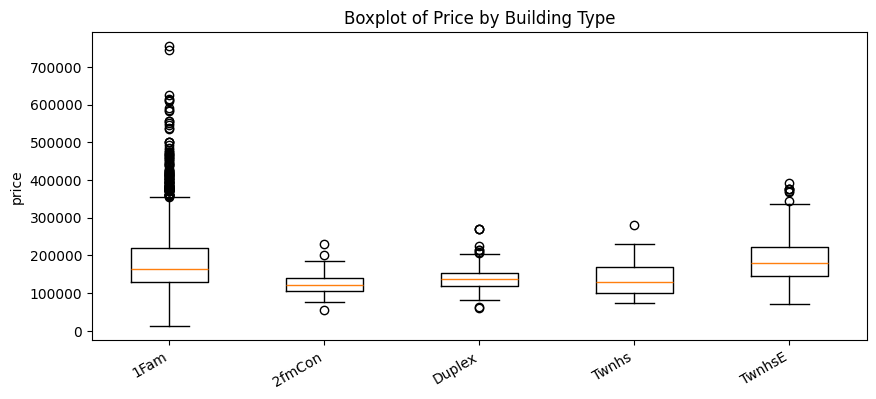

In [80]:
types = sorted(ames["Bldg.Type"].dropna().unique())
data = [ames.loc[ames["Bldg.Type"] == t, "price"].dropna() for t in types]

plt.figure(figsize=(10,4))
plt.boxplot(data, labels=types, vert=True, showfliers=True)
plt.xticks(rotation=30, ha="right")
plt.ylabel("price")
plt.title("Boxplot of Price by Building Type")
plt.show()

Based on the boxplot conditional on building price, 1Fam has the most price outliers compared to all of the other buildings.

In [81]:
#Q7.5
q1 = ames["price"].quantile(0.25)
q3 = ames["price"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

ames["price_outlier"] = ((ames["price"] < lower) | (ames["price"] > upper)).astype(int)

ames["price_outlier"].value_counts()


,count
price_outlier,
0,2793
1,137


In [82]:
#Q7.6
p01 = ames["price"].quantile(0.01)
p99 = ames["price"].quantile(0.99)

ames["price_winsor"] = ames["price"].clip(lower=p01, upper=p99)

ames["price_winsor"].describe()


,price_winsor
count,2930.000000
mean,180091.154334
std,75842.579174
min,61756.070000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,456666.370000


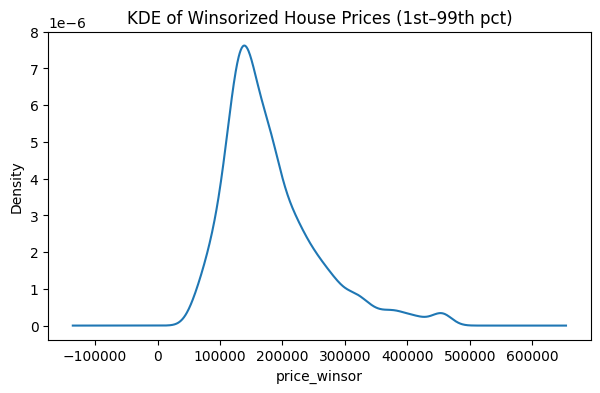

In [83]:
plt.figure(figsize=(7,4))
ames["price_winsor"].dropna().plot(kind="kde")
plt.xlabel("price_winsor")
plt.title("KDE of Winsorized House Prices (1st–99th pct)")
plt.show()

In [84]:
compare = pd.DataFrame({
    "original": ames["price"].describe(),
    "winsorized": ames["price_winsor"].describe()
})
compare

,original,winsorized
count,2930.000000,2930.000000
mean,180796.060068,180091.154334
std,79886.692357,75842.579174
min,12789.000000,61756.070000
25%,129500.000000,129500.000000
50%,160000.000000,160000.000000
75%,213500.000000,213500.000000
max,755000.000000,456666.370000


Winsorizing caps extreme values, which reduces the influence of outliers on the distribution. Compared to the original price variable, the winsorized version shows a smaller maximum and a slightly reduced standard deviation, while the center changes little. The KDE becomes less heavy-tailed, reflecting fewer extreme high-price observations.
